In [1]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

import scipy.io
import networkx as nx
import scipy.sparse.csgraph as csgraph
from scipy.spatial.distance import pdist, squareform
from scipy.stats import gaussian_kde

# PCA: Food consumption in European countries

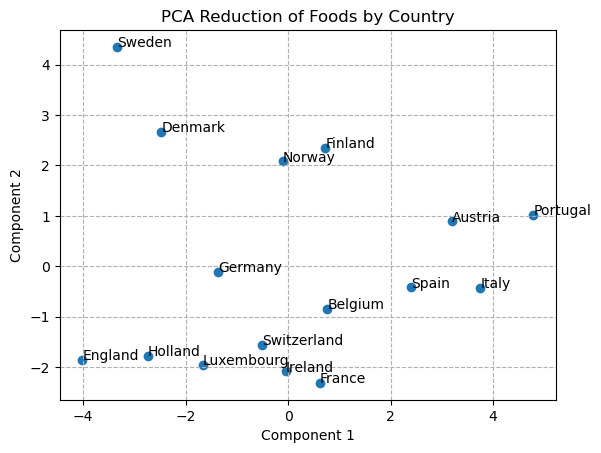

In [2]:
path = 'food-consumption.csv'

data = pd.read_csv(path).to_numpy()
y = data[:,0]
data = data[:,1:]

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m
# pca the data
S,V = ll.eigs(C,k = 2)

# project the data to the top 2 principal directions
pdata = np.dot(ndata,-V.real)

plt.grid(True,linestyle='dashed')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Reduction of Foods by Country')
plt.scatter(pdata[:, 0], pdata[:, 1])
for i, j in enumerate(y):
    plt.annotate(j, (pdata[i, 0], pdata[i, 1]))

plt.show()

In order to perform PCA, first the input data is standardized using the scale function. The covariance matrix is calculated from this standardized matrix and then used to get the eigenvectors and values, the rows and columns show covaraiance between features. The stanbdardized data is then taken as the dot product with the eigenvectors for the top 2 principal components. The result is the food data reduced to 2 dimensions (as lienar combinations of the food items).<br>

In this last run it appears that Sweden and Denmark are outliers in some manner of the food their eat, while their is a cealr grouping of countries in close proximity with england in the lower right corner.


Now, we will perform PCA analysis on the data by treating country consumptions as “feature” vectors for each food item. In other words, we will now find weight vectors to combine country consumptions for each food item to perform PCA another way.

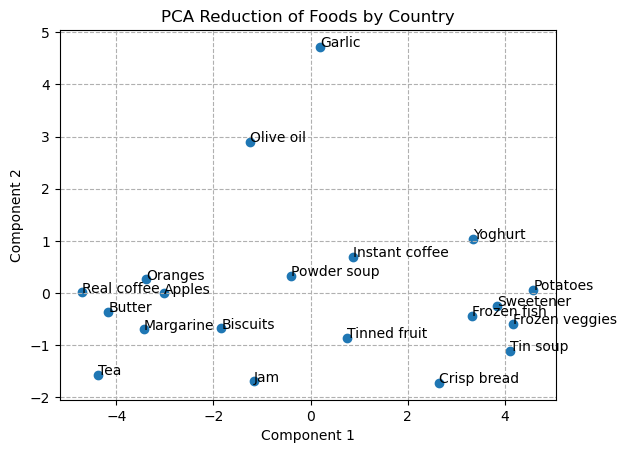

In [3]:
path = 'food-consumption.csv'

data = pd.read_csv(path)
y=data.columns.to_numpy()
y=y[1:]
data=data.T.to_numpy()
data=data[1:,]

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m
# pca the data
S,V = ll.eigs(C,k = 2)

# project the data to the top 2 principal directions
pdata = np.dot(ndata,-V.real)

plt.grid(True,linestyle='dashed')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Reduction of Foods by Country')
plt.scatter(pdata[:, 0], pdata[:, 1])
for i, j in enumerate(y):
    plt.annotate(j, (pdata[i, 0], pdata[i, 1]))

plt.show()

Repeated the steps above with transposed data. In this run it seems that olive oil and garlic are outliers. Much like the previous PCA, there seems to be a clustering of British and British adjacent foods clusterd in the top left corner.

# Order of faces using ISOMAP 

I will visualize the nearest neighbor graph below.

[[0.         0.         6.74323967 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [6.74323967 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


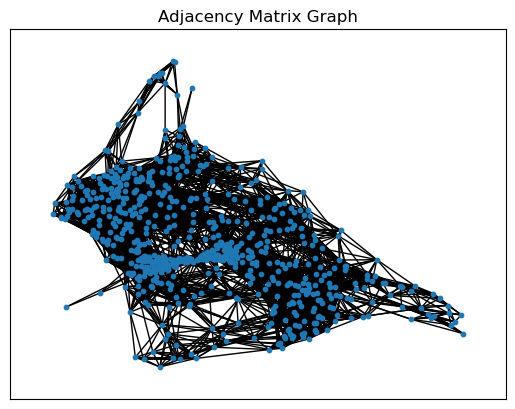

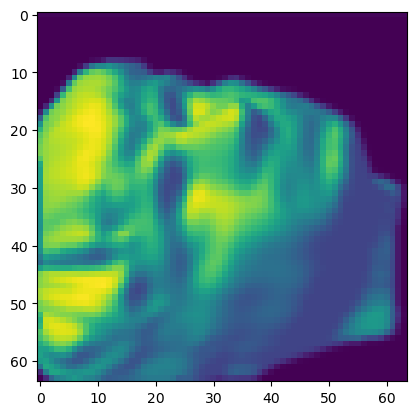

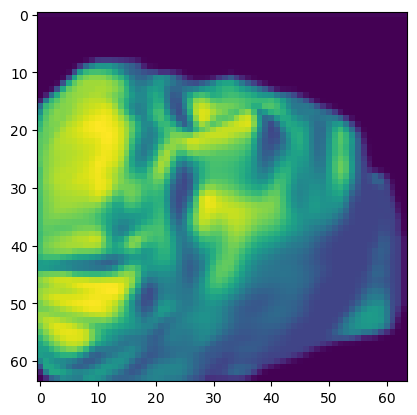

In [4]:
data_dictionary = scipy.io.loadmat('isomap.mat')
data = data_dictionary['images']
data=data.T
m, n = data.shape
distance = squareform(pdist(data))
epsilon = np.mean(distance)*.6
adj_mat = np.where(distance <= epsilon, distance, 0)

print(adj_mat)
graph_dat = nx.from_numpy_array(adj_mat)
nx.draw_networkx(graph_dat, node_size=10, with_labels=False)
plt.title('Adjacency Matrix Graph')
plt.show()

plt.imshow(data[0].reshape(64,64))
plt.show()
plt.imshow(data[2].reshape(64,64))
plt.show()

I created an adjacentcy matrix using mean distance of all pairs times .6 for epsilon through trial and error as it resulted in an interpertable but not too busy component graph above. I graphed my results using networkx, using node size 10 to try and make the graph a little less busy while preserving mappings. From the Adjcancy matrix, I found 2 images that were adjacent to each other (the first and third images, seen in my matrix) and included their images--interestingly almost identical. It seems all is working so far.

Now I will Implement the ISOMAP algorithm to obtain a two-dimensional low-dimensional embedding.

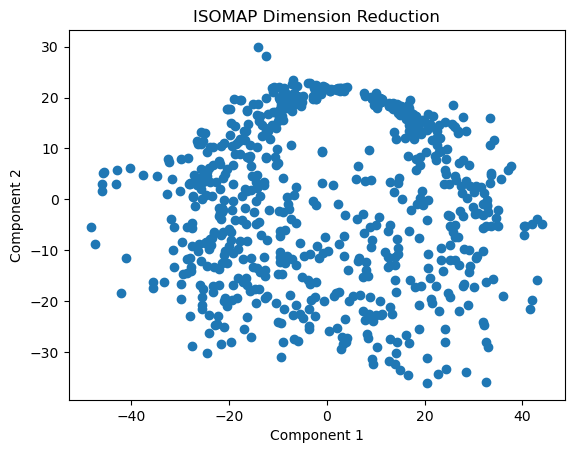

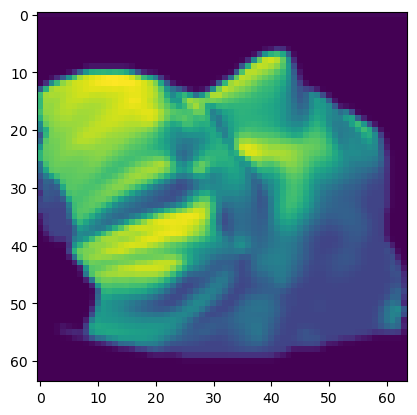

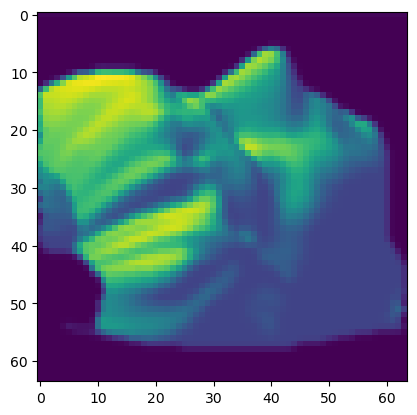

In [5]:
D = csgraph.shortest_path(adj_mat)
H = np.eye(m) - (1/m)*np.ones((m, m))
C = -(1/2)*H.dot(D**2).dot(H)
vals, vecs = np.linalg.eigh(C)
sort = np.argsort(vals)[::-1]
sorted_vals = vals[sort]
sorted_vecs = vecs[:, sort]
Z = sorted_vecs[:, :2] * np.sqrt(sorted_vals[:2])

plt.scatter(Z[:, 0], Z[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ISOMAP Dimension Reduction')
plt.show()

comp2 = Z[:,1]
#print(np.where(comp2>25)[0])

image=data[35].reshape(64, 64)
plt.imshow(image)
plt.show()
image2=data[538].reshape(64, 64)
plt.imshow(image2)
plt.show()

comp1 = Z[:,0]
#print(np.where(comp1<-47)[0])

# image3=data[67].reshape(64, 64)
# plt.imshow(image3)
# plt.show()
# image4=data[571].reshape(64, 64)
# plt.imshow(image4)
# plt.show()

I followed the algorithm given in lecture and plotted the results. I selected 2 pairs of outliers in the isomap scatterplot that were close together to examine. The images for the first pair are above, they are the 2 points with the highest values for component 2. Both pairs were nearly identical with the faces facing the same direction, similar to what we saw in lecture.

Finally I will perform PCA on the images and project them into the top 2 principal components.

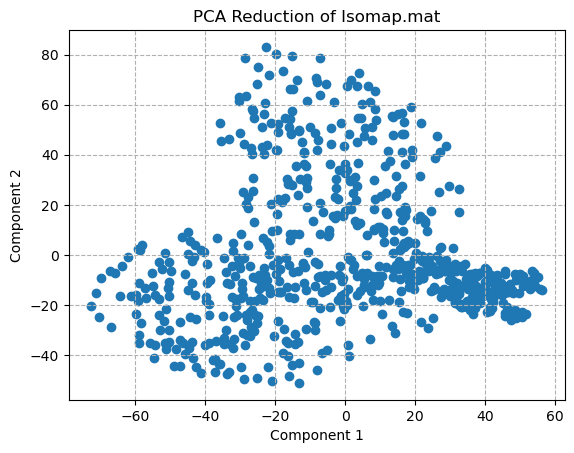

In [6]:
data_dictionary = scipy.io.loadmat('isomap.mat')
data = data_dictionary['images']
data=data.T
ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m
# pca the data
S,V = ll.eigs(C,k = 2)

# project the data to the top 2 principal directions
pdata = np.dot(ndata,-V.real)

plt.grid(True,linestyle='dashed')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Reduction of Isomap.mat')
plt.scatter(pdata[:, 0], pdata[:, 1])
plt.show()

I applied the PCA from section 2 to the Isomap dataset. I would argue that Isomap offers a more meaningful projection as the points are more spread out, offering more range to differentiate similar images. In the PCA graph the right side is very closely clustered, it seems 2 dimsions is not enough to differentiate a certain cluster of images.